In [1]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import diffrax
import jax.numpy as jnp
import jax
import optax

jax.config.update("jax_enable_x64", True)
from jaxkineticmodel.parameter_estimation.training import (
    create_log_params_means_centered_loss_func2,
    log_transform_parameters,
    exponentiate_parameters,
)
from scripts.analysis_helper_functions.helper_function_glycolysis_analysis import prepare_glycolysis_model

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
n_parameters 141


In [2]:
expression_data = pd.read_csv("datasets/VanHeerden_Glucose_Pulse/PvanHoekExpressionData.csv", index_col=0)

column_pairs = [
    ("D_HXK", "HXK"),
    ("D_PGI", "PGI"),
    ("D_PFK", "PFK"),
    ("D_FBA", "FBA"),
    ("D_TPI", "TPI"),
    ("D_GAPDH", "GAPDH"),
    ("D_PGK", "PGK"),
    ("D_PGM", "PGM"),
    ("D_ENO", "ENO"),
    ("D_PYK", "PYK"),
    ("D_PDC", "PDC"),
    ("D_ADH", "ADH"),
]

interpolation_expression_dict = {}

Ds = jnp.linspace(0, 0.375, 100)

for D_col, col in column_pairs:
    interp_key = f"expr_interpolated_{col}"
    interpolation_expression_dict[interp_key] = diffrax.LinearInterpolation(
        ts=jnp.array(expression_data[D_col]), ys=jnp.array(expression_data[col])
    )

In [3]:
y0_dict = {
    "ICG1P": 0.064568,
    "ICT6P": 0.093705,
    "ICtreh": 63.312040,
    "ICglucose": 0.196003,
    "ICG6P": 0.716385,
    "ICF6P": 0.202293,
    "ICFBP": 0.057001,
    "ICDHAP": 0.048571,
    "ICG3P": 0.020586,
    "ICglyc": 0.1,
    "ICGAP": 0.006213,
    "ICBPG": 0.0001,
    "IC3PG": 2.311074,
    "IC2PG": 0.297534,
    "ICPEP": 1.171415,
    "ICPYR": 0.152195,
    "ICACE": 0.04,
    "ICETOH": 10.0,
    "ECETOH": 0,
    "ECglycerol": 0.0,
    "ICNADH": 0.0106,
    "ICNAD": 1.5794,
    "ICATP": 3.730584,
    "ICADP": 1.376832,
    "ICAMP": 0.431427,
    "ICPHOS": 10,
    "ICIMP": 0.100,
    "ICINO": 0.100,
    "ICHYP": 1.5,
}

y0 = jnp.array(list(y0_dict.values()))
metabolite_names = list(y0_dict.keys())

# glycolyse=glycolysis(interpolated_mets,metabolite_names,dilution_rate=0.1)
# term=diffrax.ODETerm(glycolyse)
# dataset1=pd.read_csv("datasets/VanHeerden_Glucose_Pulse/FF1_timeseries_format.csv",index_col=0).T
# time_points=[int(i) for i in dataset1.index.to_list()]

In [4]:
# input y0


glycolyse_GP1, time_points_GP1, y0_GP1, dataset_GP1 = prepare_glycolysis_model(
    data_type="glucose_pulse", dilution_rate="0.1", y0_dict=y0_dict
)
glycolyse_SS_01, time_points_SS_01, y0_SS_01, dataset_SS_01 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.02", y0_dict=y0_dict
)
glycolyse_SS_05, time_points_SS_05, y0_SS_05, dataset_SS_05 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.05", y0_dict=y0_dict
)
glycolyse_SS_10, time_points_SS_10, y0_SS_10, dataset_SS_10 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.1", y0_dict=y0_dict
)
glycolyse_SS_20, time_points_SS_20, y0_SS_20, dataset_SS_20 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.2", y0_dict=y0_dict
)
glycolyse_SS_30, time_points_SS_30, y0_SS_30, dataset_SS_30 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.3", y0_dict=y0_dict
)
glycolyse_SS_325, time_points_SS_325, y0_SS_325, dataset_SS_325 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.325", y0_dict=y0_dict
)
glycolyse_SS_35, time_points_SS_35, y0_SS_35, dataset_SS_35 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.35", y0_dict=y0_dict
)
glycolyse_SS_375, time_points_SS_375, y0_SS_375, dataset_SS_375 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.375", y0_dict=y0_dict
)


#

In [5]:
glycolyse_GP1.atol = 1e-14
glycolyse_GP1.rto1 = 1e-12

In [6]:
datasets = {
    "GP1": jnp.array(dataset_GP1),
    "SS_01": jnp.array(dataset_SS_01),
    "SS_05": jnp.array(dataset_SS_05),
    "SS_10": jnp.array(dataset_SS_10),
    "SS_20": jnp.array(dataset_SS_20),
    "SS_30": jnp.array(dataset_SS_30),
    "SS_325": jnp.array(dataset_SS_325),
    "SS_35": jnp.array(dataset_SS_35),
    "SS_375": jnp.array(dataset_SS_375),
}

time_points = {
    "GP1": jnp.array(time_points_GP1),
    "SS_01": jnp.array(time_points_SS_01),
    "SS_05": jnp.array(time_points_SS_05),
    "SS_10": jnp.array(time_points_SS_10),
    "SS_20": jnp.array(time_points_SS_20),
    "SS_30": jnp.array(time_points_SS_30),
    "SS_325": jnp.array(time_points_SS_325),
    "SS_35": jnp.array(time_points_SS_35),
    "SS_375": jnp.array(time_points_SS_375),
}

In [10]:
np.where(dataset_SS_325.columns == "ECETOH")

(array([18]),)

In [233]:
loss_targets_glucose_pulse = [0, 1, 2, 4, 5, 6, 10, 12, 14, 22, 23, 24]
loss_targets_steady_state = [4, 5, 6, 7, 10, 12, 13, 14, 15, 18, 20, 21, 22]

log_loss_func_GP1 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_GP1, loss_targets_glucose_pulse))
log_loss_func_SS_01 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_01, loss_targets_steady_state))
log_loss_func_SS_05 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_05, loss_targets_steady_state))
log_loss_func_SS_10 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_10, loss_targets_steady_state))
log_loss_func_SS_20 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_20, loss_targets_steady_state))
log_loss_func_SS_30 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_30, loss_targets_steady_state))
log_loss_func_SS_325 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_325, loss_targets_steady_state))
log_loss_func_SS_35 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_35, loss_targets_steady_state))
log_loss_func_SS_375 = jax.jit(create_log_params_means_centered_loss_func2(glycolyse_SS_375, loss_targets_steady_state))

In [76]:
params = pd.read_csv(
    "parameter_initializations/Glycolysis_model/parameter_initialization_glycolysis_literature_values.csv", index_col=0
).to_dict()["0"]

In [77]:
# params_after_fitting=pd.read_csv("results/EXP4_Glycolysis_Fitting_Datasets/0909_params_gradient_descent_federated.csv",index_col=0).to_dict()['0']
# params=params_after_fitting


lr = 1e-4

optimizer = optax.adabelief(lr)
clip_by_global = optax.clip_by_global_norm(np.log(4))
optimizer = optax.chain(optimizer, clip_by_global)
opt_state = optimizer.init(params)
params_init = params


loss_per_iter1 = []
loss_per_iter2 = []
loss_per_iter3 = []
loss_per_iter4 = []
loss_per_iter5 = []
loss_per_iter6 = []
loss_per_iter7 = []
loss_per_iter8 = []
loss_per_iter9 = []

In [234]:
grads_GP1 = jax.jit(jax.grad(log_loss_func_GP1, 0))
grads_SS_01 = jax.jit(jax.grad(log_loss_func_SS_01, 0))
grads_SS_05 = jax.jit(jax.grad(log_loss_func_SS_05, 0))
grads_SS_10 = jax.jit(jax.grad(log_loss_func_SS_10, 0))
grads_SS_20 = jax.jit(jax.grad(log_loss_func_SS_20, 0))
grads_SS_30 = jax.jit(jax.grad(log_loss_func_SS_30, 0))
grads_SS_325 = jax.jit(jax.grad(log_loss_func_SS_325, 0))
grads_SS_35 = jax.jit(jax.grad(log_loss_func_SS_35, 0))
grads_SS_375 = jax.jit(jax.grad(log_loss_func_SS_375, 0))

In [217]:
parameters_step_dict = {}

### Gradient descent on multiple datasets
We have multiple datasets that have some dilution rate dependencies. However we expect that the kcat is consistent between datasets. We need to therefore first update parameters for the different dilution rates and then calculate the loss function. We then have to calculate the gradient in the same way as before. We then simply use the gradients on the pre-transformed parameters as an update rule. 

In [235]:
# params_init=params
ys = datasets
ts = time_points


for step in range(100):
    log_params = log_transform_parameters(
        params_init
    )  # not used to calculate gradients, but is updated in line 57 (optax apply updates)
    # log_params_01=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.01))
    # log_params_05=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.05))
    # log_params_10=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.1))
    # log_params_20=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.2))
    # log_params_30=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.3))
    # log_params_325=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.325))
    # log_params_35=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.35))
    # log_params_375=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.375))

    ## gradients are calculated for the update parameters
    loss1 = log_loss_func_GP1(log_params, ts["GP1"], ys["GP1"])
    grads = grads_GP1(log_params, ts["GP1"], ys["GP1"])

    # loss2=log_loss_func_SS_01(log_params_01,ts['SS_01'],ys['SS_01'])
    # grads2=grads_SS_01(log_params_01,ts['SS_01'],ys['SS_01'])

    # loss3=log_loss_func_SS_05(log_params_05,ts['SS_05'],ys['SS_05'])
    # grads3=grads_SS_05(log_params_05,ts['SS_05'],ys['SS_05'])

    # loss4=log_loss_func_SS_10(log_params_10,ts['SS_10'],ys['SS_10'])
    # grads4=grads_SS_10(log_params_10,ts["SS_10"],ys['SS_10'])

    # loss5=log_loss_func_SS_20(log_params_20,ts['SS_20'],ys['SS_20'])
    # grads5=grads_SS_20(log_params_20,ts['SS_20'],ys['SS_20'])

    # loss6=log_loss_func_SS_30(log_params_30,ts['SS_30'],ys['SS_30'])
    # grads6=grads_SS_30(log_params_30,ts['SS_30'],ys['SS_30'])

    # loss7=log_loss_func_SS_325(log_params_325,ts['SS_325'],ys['SS_325'])
    # grads7=grads_SS_325(log_params_325,ts['SS_325'],ys['SS_325'])

    # loss8=log_loss_func_SS_35(log_params_35,ts['SS_35'],ys['SS_35'])
    # grads8=grads_SS_35(log_params_35,ts['SS_35'],ys['SS_35'])

    # loss9=log_loss_func_SS_375(log_params_375,ts['SS_375'],ys['SS_375'])
    # grads9=grads_SS_375(log_params_375,ts['SS_375'],ys['SS_375'])

    # Gradients are averaged
    # for key in grads1.keys():
    #     grads[key]=(grads1[key]+grads2[key]+grads3[key]+grads4[key])/4#+grads5[key]+grads6[key]+grads7[key]+grads8[key]+grads9[key])/9

    # we perform the updataset
    updates, opt_state = optimizer.update(grads, opt_state)
    # we perform updates in log space, but only return params in lin space
    log_params = optax.apply_updates(log_params, updates)
    lin_params = exponentiate_parameters(log_params)
    params_init = lin_params

    loss_per_iter1.append(float(loss1))

    if step % 30 == 0:
        print(f"Step {step}, Loss {loss1}")
        parameters_step_dict[step] = params_init

jax.pure_callback failed
Traceback (most recent call last):
  File "/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py", line 77, in pure_callback_impl
    return callback(*args)
           ^^^^^^^^^^^^^^^
  File "/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py", line 65, in __call__
    return tree_util.tree_leaves(self.callback_func(*args, **kwargs))
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/equinox/_errors.py", line 70, in raises
    raise EqxRuntimeError(msgs[_index.item()])
equinox._errors.EqxRuntimeError: The maximum number of solver steps was reached. Try increasing `max_steps`.


XlaRuntimeError: INTERNAL: Generated function failed: CpuCallback error: EqxRuntimeError: The maximum number of solver steps was reached. Try increasing `max_steps`.

At:
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/equinox/_errors.py(70): raises
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py(65): __call__
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py(80): pure_callback_impl
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py(219): _callback
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/interpreters/mlir.py(2466): _wrapped_callback
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/interpreters/pxla.py(1205): __call__
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/profiler.py(335): wrapper
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(1427): _pjit_call_impl_python
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(1471): call_impl_cache_miss
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(1494): _pjit_call_impl
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/core.py(913): process_primitive
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/core.py(425): bind_with_trace
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/core.py(2788): bind
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(176): _python_pjit_helper
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(298): cache_miss
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/traceback_util.py(179): reraise_with_filtered_traceback
  /tmp/ipykernel_38566/502054737.py(22): <module>
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3577): run_code
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3517): run_ast_nodes
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3334): run_cell_async
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3130): _run_cell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3075): run_cell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/zmqshell.py(549): run_cell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/ipkernel.py(446): do_execute
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(778): execute_request
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/ipkernel.py(359): execute_request
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(437): dispatch_shell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(534): process_one
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(545): dispatch_queue
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/asyncio/events.py(88): _run
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/asyncio/base_events.py(1987): _run_once
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/asyncio/base_events.py(641): run_forever
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/tornado/platform/asyncio.py(205): start
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelapp.py(739): start
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/traitlets/config/application.py(1075): launch_instance
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel_launcher.py(18): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


In [34]:
# losses_per_iterations={"loss_per_iter1":loss_per_iter1,"loss_per_iter2":loss_per_iter2,
#                      "loss_per_iter3":loss_per_iter3,"loss_per_iter4":loss_per_iter4,
#                      "loss_per_iter5":loss_per_iter5,"loss_per_iter6":loss_per_iter6,
#                      "loss_per_iter7":loss_per_iter7,"loss_per_iter8":loss_per_iter8,
#                     "loss_per_iter9":loss_per_iter9}
# losses_per_iterations_added=pd.DataFrame(losses_per_iterations)
# losses_per_iterations_added.to_csv("results/EXP4_Glycolysis_Fitting_Datasets/1109_losses_for_9_datasets.csv")
# params_to_save=pd.DataFrame(pd.Series(params_init))
# params_to_save.to_csv("results/EXP4_Glycolysis_Fitting_Datasets/1109_params_gradient_descent_federated.csv")

Text(0.5, 0, 'iterations')

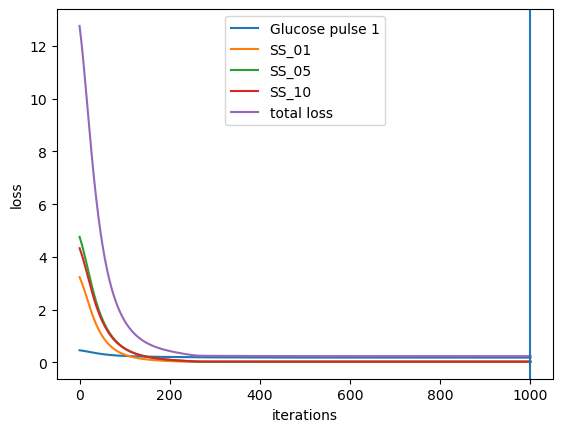

In [35]:
# # pd.DataFrame(pd.Series(new_params)).to_csv("1000iterations_params.csv")
# plt.plot(losses_per_iterations['loss_per_iter1'],label="Glucose pulse 1")
# plt.plot(losses_per_iterations['loss_per_iter2'],label="SS_01")

# plt.plot(losses_per_iterations['loss_per_iter3'],label="SS_05")
# plt.plot(losses_per_iterations['loss_per_iter4'],label="SS_10")
# # plt.plot(losses_per_iterations['loss_per_iter5'],label="SS_20")
# # plt.plot(losses_per_iterations['loss_per_iter6'],label="SS_30")
# # plt.plot(losses_per_iterations['loss_per_iter7'],label="SS_32")
# # plt.plot(losses_per_iterations['loss_per_iter8'],label="SS_35")
# # plt.plot(losses_per_iterations['loss_per_iter9'],label="SS_375")


# plt.plot(losses_per_iterations_added.sum(axis=1),label="total loss")
# plt.axvline(np.argmin(losses_per_iterations_added.sum(axis=1)))
# # plt.axvline(np.argmin(losses_per_iterations['loss_per_iter8']))
# plt.ylabel("loss")
# # plt.yscale("log")
# plt.legend()
# plt.xlabel("iterations")


Array(0.17478831, dtype=float64)

In [37]:
def give_steady_states(model, params_init, y0):
    ts = jnp.linspace(0, 3000, 1000)
    metabolite_names = list(y0.keys())
    ys_pred = model(ts, jnp.array(list(y0.values())), params_init)

    ys_final_steady_state = ys_pred[-1, :]
    ys_final_steady_state = dict(zip(metabolite_names, ys_final_steady_state))
    return ys_final_steady_state

In [38]:
y0_SS_375

{'ICG1P': 0.1,
 'ICT6P': 0.015,
 'ICtreh': 63.31204,
 'ICglucose': 0.196003,
 'ICG6P': 3.505,
 'ICF6P': 0.438,
 'ICFBP': 0.00595,
 'ICDHAP': 0.6865,
 'ICG3P': 0.11,
 'ICglyc': 0.1,
 'ICGAP': 0.0215,
 'ICBPG': 0.0001,
 'IC3PG': 1.0,
 'IC2PG': 0.297534,
 'ICPEP': 0.095,
 'ICPYR': 3.7,
 'ICACE': 0.04,
 'ICETOH': 54.05,
 'ICNADH': 0.0283928571428571,
 'ICNAD': 1.56160714285714,
 'ICATP': 2.9025,
 'ICADP': 0.4795,
 'ICAMP': 0.112,
 'ICPHOS': 10,
 'ICIMP': 0.1,
 'ICINO': 0.1,
 'ICHYP': 1.5}

In [40]:
# params_01=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.01))
# params_05=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.05))
# params_10=log_transform_parameters(update_parameters_by_dilution_rate(params_init,interpolation_expression_dict,D=0.1))

# D01_SS=give_steady_states(glycolyse_SS_10,params_init,y0_SS_10)
# D05_SS=give_steady_states(glycolyse_SS_05,params_init,y0_SS_05)
# D10_SS=give_steady_states(glycolyse_SS_10,params_init,y0_SS_10)
# # D20_SS=give_steady_states(glycolyse_SS_20,params_init,y0_SS_20)
# # D30_SS=give_steady_states(glycolyse_SS_30,params_init,y0_SS_30)
# # D325_SS=give_steady_states(glycolyse_SS_325,params_init,y0_SS_325)
# # D35_SS=give_steady_states(glycolyse_SS_35,params_init,y0_SS_35)
# # D375_SS=give_steady_states(glycolyse_SS_375,params_init,y0_SS_375)

In [ ]:
# D375_SS['ICETOH']

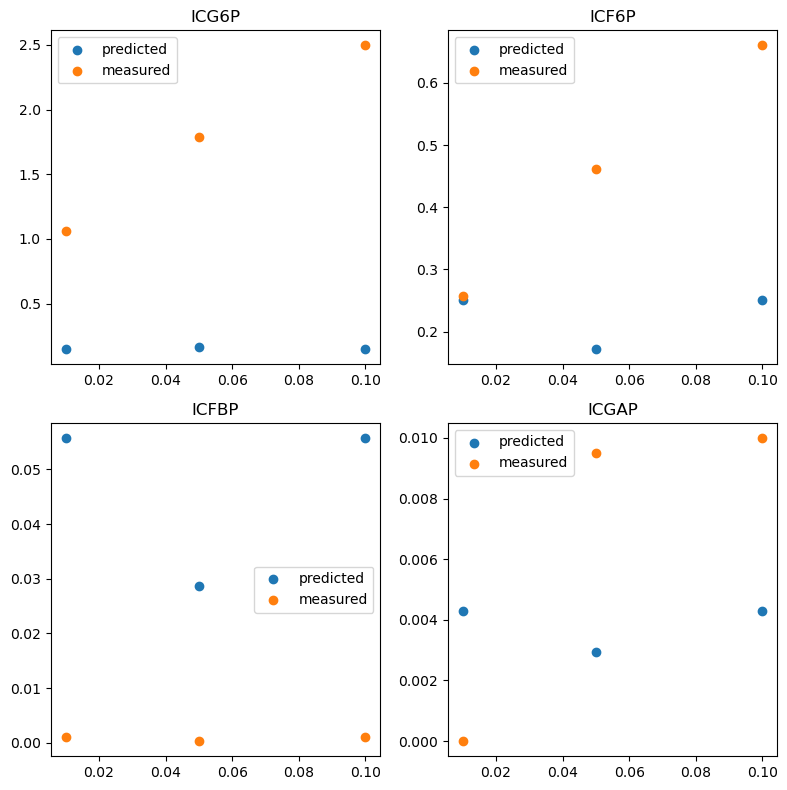

In [44]:
# Dilutions=[0.01,0.05,0.1,0.2,0.3,0.325,0.350,0.375]


# # Creating a 4x4 grid for the plots
# fig, axs = plt.subplots(2, 2, figsize=(8, 8))
# metabolites=["ICG6P","ICF6P","ICPYR","ICETOH"]
# # Loop through metabolites to generate plots
# for i, metabolite in enumerate(metabolites):  # Adjust the range as necessary
#     row, col = divmod(i, 2)
#     ax = axs[row, col]

#     measured = [y0_SS_01[metabolite], y0_SS_05[metabolite], y0_SS_10[metabolite], y0_SS_20[metabolite],
#                 y0_SS_30[metabolite], y0_SS_325[metabolite], y0_SS_35[metabolite], y0_SS_375[metabolite]]

#     SS_values = [D01_SS[metabolite], D05_SS[metabolite], D10_SS[metabolite], D20_SS[metabolite],
#                  D30_SS[metabolite], D325_SS[metabolite], D35_SS[metabolite], D375_SS[metabolite]]

#     ax.scatter(Dilutions, SS_values, label="predicted")
#     ax.scatter(Dilutions, measured, label="measured")

#     ax.set_title(metabolite)
#     ax.set_ylim(0, max(max(measured), max(SS_values)) * 1.2)  # Adjust ylim dynamically
#     ax.legend()

# plt.tight_layout()
# plt.show()

Array([ 0, 20, 40, 60, 80], dtype=int64)

In [227]:
y0_GP1["ICglyc"] = 0.1
ts = jnp.linspace(0, 340, 1000)

ys = glycolyse_GP1(ts, y0=jnp.array(list(y0_GP1.values())), params=params_init)
ys = pd.DataFrame(ys, columns=metabolite_names)

# plt.plot(ts, ys["ICADP"], label=i)

plt.scatter(time_points_GP1, dataset_GP1["ICATP"], label="IC3PG")
plt.legend()
plt.show()

# for i in jnp.arange(0,300,30):
#     ys=glycolyse_GP1(ts,y0=jnp.array(list(y0_GP1.values())),params=parameters_step_dict[int(i)])
#     ys=pd.DataFrame(ys,columns=metabolite_names)

#     plt.plot(ts,ys['ICADP'],label=i)
#     plt.plot(ts,ys['ICAMP'],label=i)
#     plt.plot(ts,ys['ICATP'],label=i)

# plt.scatter(time_points_GP1,dataset_GP1['ICADP'],label="ICtreh")
# plt.legend()

jax.pure_callback failed
Traceback (most recent call last):
  File "/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py", line 77, in pure_callback_impl
    return callback(*args)
           ^^^^^^^^^^^^^^^
  File "/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py", line 65, in __call__
    return tree_util.tree_leaves(self.callback_func(*args, **kwargs))
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/equinox/_errors.py", line 70, in raises
    raise EqxRuntimeError(msgs[_index.item()])
equinox._errors.EqxRuntimeError: The maximum number of solver steps was reached. Try increasing `max_steps`.


XlaRuntimeError: INTERNAL: Generated function failed: CpuCallback error: EqxRuntimeError: The maximum number of solver steps was reached. Try increasing `max_steps`.

At:
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/equinox/_errors.py(70): raises
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py(65): __call__
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py(80): pure_callback_impl
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/callback.py(219): _callback
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/interpreters/mlir.py(2466): _wrapped_callback
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/interpreters/pxla.py(1205): __call__
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/profiler.py(335): wrapper
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(1427): _pjit_call_impl_python
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(1471): call_impl_cache_miss
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(1494): _pjit_call_impl
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/core.py(913): process_primitive
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/core.py(425): bind_with_trace
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/core.py(2788): bind
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(176): _python_pjit_helper
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/pjit.py(298): cache_miss
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/jax/_src/traceback_util.py(179): reraise_with_filtered_traceback
  /tmp/ipykernel_38566/2252961464.py(4): <module>
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3577): run_code
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3517): run_ast_nodes
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3334): run_cell_async
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3130): _run_cell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py(3075): run_cell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/zmqshell.py(549): run_cell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/ipkernel.py(446): do_execute
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(778): execute_request
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/ipkernel.py(359): execute_request
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(437): dispatch_shell
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(534): process_one
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelbase.py(545): dispatch_queue
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/asyncio/events.py(88): _run
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/asyncio/base_events.py(1987): _run_once
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/asyncio/base_events.py(641): run_forever
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/tornado/platform/asyncio.py(205): start
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel/kernelapp.py(739): start
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/traitlets/config/application.py(1075): launch_instance
  /home/plent/anaconda3/envs/jax_env/lib/python3.12/site-packages/ipykernel_launcher.py(18): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


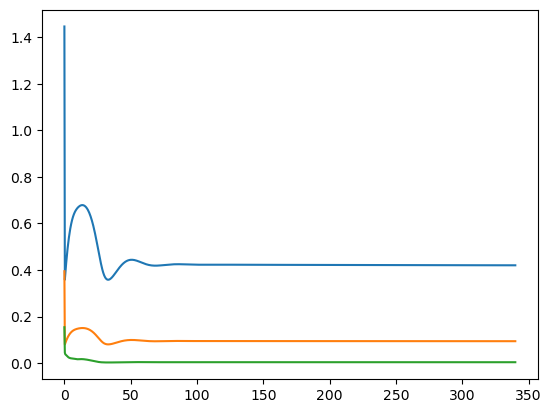

In [151]:
# plt.plot(ts,ys['ICtreh'])
plt.plot(ts, ys["ICG6P"])
plt.plot(ts, ys["ICF6P"])
# plt.plot(ts,ys['ICT6P'])
# plt.plot(ts,ys['ICtreh'])
# plt.plot(ts,ys['ICglucose'])
# plt.plot(ts,ys['ICtreh'])
plt.plot(ts, ys["ICFBP"])

In [122]:
dataset_GP1

,ICG1P,ICT6P,ICtreh,ICglucose,ICG6P,ICF6P,ICFBP,ICDHAP,ICG3P,ICglyc,...,ECglycerol,ICNADH,ICNAD,ICATP,ICADP,ICAMP,ICPHOS,ICIMP,ICINO,ICHYP
0.00000,0.101294,0.095952,57.649475,0.196003,1.446292,0.394556,0.153862,0.048571,0.020586,0.1,...,0.0,0.0106,1.5794,2.215172,0.531172,0.034658,10.0,0.1,0.1,1.5
26.96358,0.311475,0.627366,56.130349,NaN,7.655244,1.553394,5.764271,NaN,NaN,NaN,...,NaN,NaN,NaN,1.445022,0.379738,0.026519,NaN,NaN,NaN,NaN
49.79524,0.215386,1.574654,54.553894,NaN,5.597273,1.417167,7.955421,NaN,NaN,NaN,...,NaN,NaN,NaN,0.802481,0.223044,0.015810,NaN,NaN,NaN,NaN
63.79712,0.133641,2.790350,56.696895,NaN,4.946448,1.239375,8.371389,NaN,NaN,NaN,...,NaN,NaN,NaN,0.677492,0.171696,0.011998,NaN,NaN,NaN,NaN
88.71332,0.097028,3.908737,57.820378,NaN,4.562993,1.102751,7.310509,NaN,NaN,NaN,...,NaN,NaN,NaN,0.755549,0.181526,0.012624,NaN,NaN,NaN,NaN
106.95736,0.097644,5.241478,55.841663,NaN,3.803741,0.795241,5.601541,NaN,NaN,NaN,...,NaN,NaN,NaN,0.909439,0.210887,0.014885,NaN,NaN,NaN,NaN
135.23420,0.102780,5.666568,57.838492,NaN,3.821722,0.788942,4.870751,NaN,NaN,NaN,...,NaN,NaN,NaN,1.028023,0.240796,0.015626,NaN,NaN,NaN,NaN
163.31078,0.102793,5.860030,56.655560,NaN,3.664964,0.733748,4.638077,NaN,NaN,NaN,...,NaN,NaN,NaN,0.987497,0.243412,0.016633,NaN,NaN,NaN,NaN
204.30850,0.117792,7.013960,59.297397,NaN,3.476006,0.680828,3.953996,NaN,NaN,NaN,...,NaN,NaN,NaN,1.358937,0.329065,0.021349,NaN,NaN,NaN,NaN
272.17862,0.112719,7.296326,58.710645,NaN,2.880435,0.547586,3.708379,NaN,NaN,NaN,...,NaN,NaN,NaN,1.646178,0.376344,0.025302,NaN,NaN,NaN,NaN
